![qqq](../resources/header.jpg)

**Статистический анализ данных**
***

О сайте **Backloggd.com**:

'**Backloggd** — это место для хранения вашей личной коллекции видеоигр. Каждая игра со всех платформ доступна для вас, чтобы вы могли войти в свой журнал. Следуйте за друзьями, чтобы поделиться своими отзывами и сравнить рейтинги. Затем используйте фильтры, чтобы отсортировать свою коллекцию и посмотреть, что для вас важно. Ведите список того, во что вы сейчас играете и во что хотите играть, и наблюдайте, как цифры меняются по мере того, как вы продолжаете записывать свои прохождения. Есть Goodreads для книг, Letterboxd для фильмов и теперь Backloggd для игр.

Все метаданные, связанные с игрой, поступают из базы данных **[IGDB](https://www.igdb.com/)**, управляемой сообществом . Сюда входят все данные об играх, компаниях и платформах, которые вы видите на сайте.' - с сайта **[backloggd.com](https://www.backloggd.com/)**.

**Цель статистического анализа данных**: подтвердить или опровергнуть закономерности, выявленные на этапе разведочного анализа данных.

**Этапы статистичсекго анализа**:
1. [Обзор данных](#Обзор-данных).
2. [Предварительная обработка данных](Предварительная-обработка-данных)
3. [Статистический анализ данных](#Статистический-анализ-данных)
    1. [Рейтинг видеоигр](#Рейтинг-видеоигр):
        - [Оценка распределения](#Оценка-распределения);
        - [Оценка влияния факторов](#Оценка-влияния-факторов):
            - [Тип разрабочика](#Тип-разрабочика);
            - [Игровая платформа](#Игровая-платформа);
            - [Игровой жанр](#Игровой-жанр).
4. [Выводы](#Выводы)
***

In [1]:
import sys

In [2]:
sys.path.append('C:\Projects\Backloggd')

In [3]:
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec
from scipy import stats

from src.config.paths import FILE_PREPROCESSED_PATH
from src.utils.explorer import explorer
from src.utils.ml.plot.step import step

In [4]:
sns.set_style('white')

In [5]:
print(explorer(FILE_PREPROCESSED_PATH, '*.csv'))

1. backloggd.csv.
2. example.csv.


In [6]:
FILE_PATH = FILE_PREPROCESSED_PATH + r'\backloggd.csv'
RANDOM_STATE = 42

# Обзор данных
***

In [7]:
df = pd.read_csv(FILE_PATH)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105001 entries, 0 to 105000
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   name         105001 non-null  object 
 1   date         105001 non-null  object 
 2   developers   105001 non-null  object 
 3   indie        105001 non-null  bool   
 4   rating       65983 non-null   float64
 5   platforms    105001 non-null  object 
 6   genres       105001 non-null  object 
 7   category     105001 non-null  object 
 8   reviews      105001 non-null  int64  
 9   plays        105001 non-null  int64  
 10  playing      105001 non-null  int64  
 11  backlogs     105001 non-null  int64  
 12  wishlists    105001 non-null  int64  
 13  description  99591 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 93.0 MB


In [9]:
df.head()

,name,date,developers,indie,rating,platforms,genres,category,reviews,plays,playing,backlogs,wishlists,description
0,Cathode Ray Tube Amusement Device,1947-12-31,[],False,3.516129,['Analogue electronics'],['Point-and-Click'],main,43,80,1,14,34,The cathode ray tube amusement device is the e...
1,Bertie the Brain,1950-08-25,['Josef Kates'],False,2.916667,['Arcade'],"['Puzzle', 'Tactical']",main,7,10,0,5,7,Currently considered the first videogame in hi...
2,Nim,1951-12-31,[],False,2.000000,['Ferranti Nimrod Computer'],"['Pinball', 'Strategy']",main,1,2,0,1,0,The Nimrod was a special purpose computer that...
3,Draughts,1952-08-31,['Christopher Strachey'],False,1.166667,['Legacy Computer'],['Card & Board Game'],main,3,7,0,2,1,A game of draughts (a.k.a. checkers) written f...
4,OXO,1952-12-31,"['Alexander Shafto ""Sandy"" Douglas', 'Universi...",False,3.025000,"['Windows PC', 'EDSAC']","['Puzzle', 'Strategy']",main,13,34,0,8,8,OXO was a computer game developed by Alexander...


In [10]:
df.sample(5)

,name,date,developers,indie,rating,platforms,genres,category,reviews,plays,playing,backlogs,wishlists,description
89238,Total War: Rome II - Imperator Augustus Campai...,2014-09-16,"['CREATIVE ASSEMBLY', 'Sega']",False,NaN,['Windows PC'],['Strategy'],dlc,0,1,0,0,0,The Imperator Augustus Campaign Pack is a new ...
61562,Trials Rising: Gold Edition,2019-02-25,"['Ubisoft Entertainment', 'RedLynx']",False,3.333333,"['Windows PC', 'PlayStation 4', 'Xbox One', 'N...","['Platform', 'Racing', 'Sport']",main,0,14,2,15,2,Trials Rising Gold Edition includes: - Base Ga...
32815,Tien Len: Killer 13,2011-08-09,[],False,NaN,['iOS'],[],main,0,0,0,0,0,NaN
39331,Spoiler Alert,2014-06-30,"['Megafuzz', 'tinyBuild']",True,2.182927,"['Windows PC', 'Android', 'Mac', 'Linux', 'iOS...","['Adventure', 'Arcade', 'Platform', 'Puzzle']",main,3,67,1,18,3,Spoiler Alert is a video game that tests your ...
56600,Tile Battle,2018-04-04,[],True,NaN,"['Windows PC', 'Mac', 'Linux']","['Adventure', 'Strategy']",main,0,0,0,0,0,A local multiplayer mix between Warcraft III a...


In [11]:
df.tail()

,name,date,developers,indie,rating,platforms,genres,category,reviews,plays,playing,backlogs,wishlists,description
104996,Resident Evil 4: The Mercenaries - Separate Wa...,2023-09-21,['Capcom'],False,4.321429,"['Windows PC', 'PlayStation 4', 'PlayStation 5...",[],update,3,21,3,3,4,A free update for The Mercenaries mode releasi...
104997,Storyteller: Devilish Update,2023-09-26,['Annapurna Interactive'],False,3.000000,"['Windows PC', 'Android', 'iOS', 'Nintendo Swi...",[],update,1,1,0,1,0,The first update of Storyteller brings the Dev...
104998,Genshin Impact: To the Stars Shining in the De...,2023-09-27,"['Cognosphere', 'HoYoverse']",False,4.000000,"['Windows PC', 'Android', 'PlayStation 4', 'iO...","['Adventure', 'RPG']",update,3,8,5,2,0,"Version 4.1 of Genshin Impact, which includes:..."
104999,Sonic Frontiers: The Final Horizon,2023-09-28,"['Sega', 'Sonic Team']",False,2.820796,"['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'Platform']",update,143,265,77,59,26,Rewrite your destiny in The Final Horizon Upda...
105000,Among Us: The Fungle,2023-10-01,['Innersloth'],True,NaN,"['Windows PC', 'Android', 'PlayStation 4', 'iO...",['Strategy'],update,0,1,0,0,1,This free update adds a new map with new tasks...


# Предварительная обработка данных

Изменим типы данных:
- для поля **date** изменим тип данных на **datetime**;
- для **числовых полей**, уменьшим точность до **32 бит**;
- поля **developers**, **platforms** и **genres** приведем к типу **list**.

In [12]:
df.dtypes

name            object
date            object
developers      object
indie             bool
rating         float64
platforms       object
genres          object
category        object
reviews          int64
plays            int64
playing          int64
backlogs         int64
wishlists        int64
description     object
dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'].head()

0   1947-12-31
1   1950-08-25
2   1951-12-31
3   1952-08-31
4   1952-12-31
Name: date, dtype: datetime64[ns]

In [14]:
df = df.astype({
    'rating': 'float32',
    'plays': 'int32',
    'playing': 'int32',
    'backlogs': 'int32',
    'wishlists': 'int32',
    'reviews': 'int32'
})

In [15]:
df.dtypes

name                   object
date           datetime64[ns]
developers             object
indie                    bool
rating                float32
platforms              object
genres                 object
category               object
reviews                 int32
plays                   int32
playing                 int32
backlogs                int32
wishlists               int32
description            object
dtype: object

In [16]:
df['developers'] = df['developers'].apply(ast.literal_eval)
df['platforms'] = df['platforms'].apply(ast.literal_eval)
df['genres'] = df['genres'].apply(ast.literal_eval)

# Статистический анализ данных

## Рейтинг видеоигр
***

Оценка влияния факторов на ретинг видеоигр будет проводится с помощью **t-теста** и **одностороннего дисперсионного анализа (ANOVA)** с помледующим проведением апостериорного тест множественного сравнения **Tukey HSD**. 

Чтобы результаты ANOVA были действительными, должны выполняться следующие **допущения**:
1. **Нормальное распределение** — каждая выборка была взята из нормально распределенной популяции.
2. **Равные дисперсии** — дисперсии совокупностей, из которых взяты выборки, равны.
3. **Независимость** — наблюдения в каждой группе независимы друг от друга, а наблюдения внутри групп были получены методом случайной выборки.

### Оценка распределения
***

Давайте построим гистограмму и график QQ для визуальной оценки распределения.

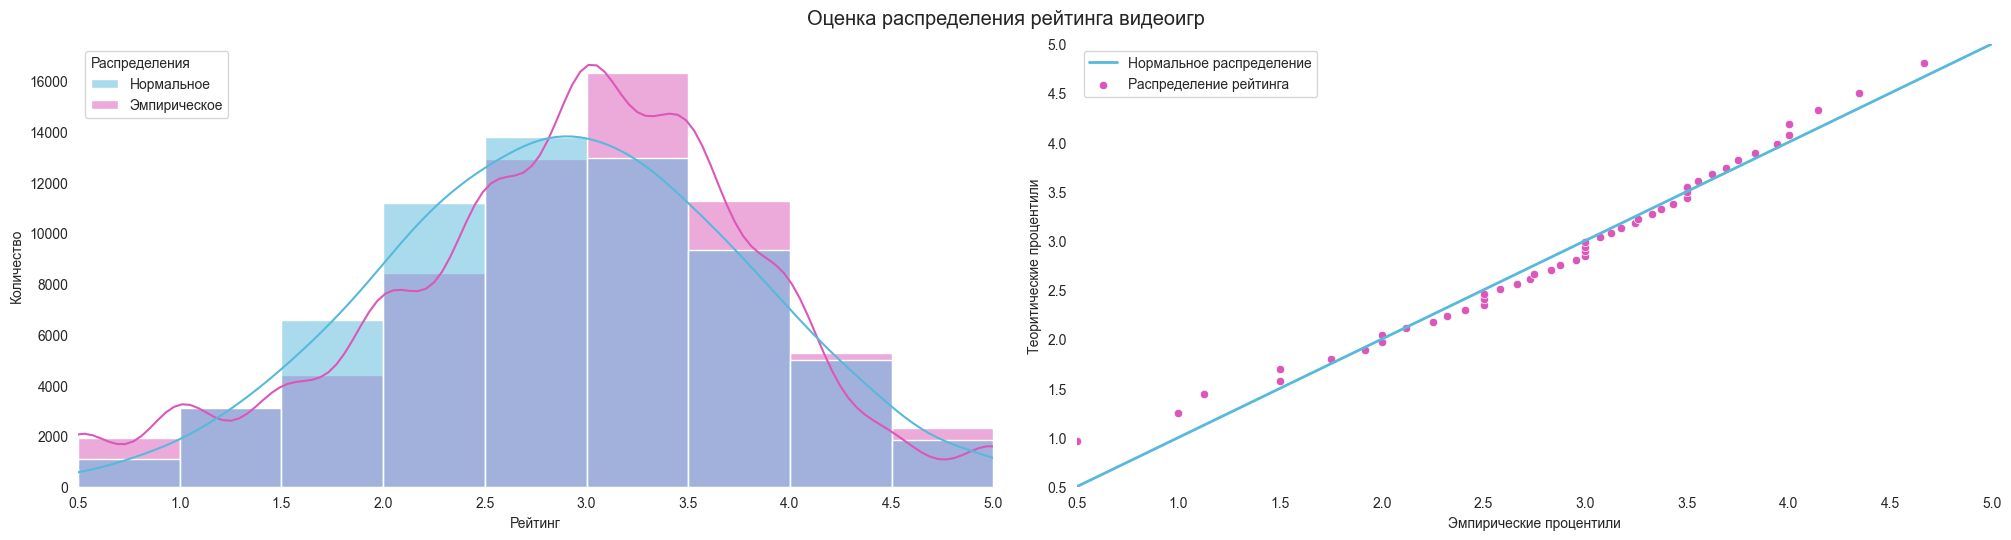

In [17]:
figure = plt.figure(
    layout='constrained',
    figsize=(20, 5)
)

figure.suptitle(
    t='Оценка распределения рейтинга видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.025
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

rating_distribution = df.loc[df['rating'].notna(), 'rating']
normal_distribution = np.random.normal(
    loc=rating_distribution.mean(), 
    scale=rating_distribution.std(), 
    size=rating_distribution.size
)
percentiles = np.linspace(0, 100, 51)
rating = np.percentile(rating_distribution, percentiles)
normal = np.percentile(normal_distribution, percentiles)

plot_data = (pd.concat(
    objs=[pd.DataFrame({'value': normal_distribution,
                        'type': ['theoretical']*normal_distribution.size}),
          pd.DataFrame({'value': df['rating'],
                        'type': ['sample']*df['rating'].size})])
             .reset_index(drop=True))

sns.histplot(
    data=plot_data,
    x='value',
    hue='type',
    bins=np.linspace(0.0, 5.0, 11),
    kde=True,
    kde_kws={'bw_adjust': 1.5},
    ax=figure.axes[0], 
    palette=sns.color_palette('hls', 15)[8::5]
)

figure.axes[0].set_xlabel('Рейтинг')
figure.axes[0].set_ylabel('Количество')
figure.axes[0].set_xbound((0.5, 5.0))
figure.axes[0].set_xticks(np.linspace(0.5, 5.0, 10))
figure.axes[0].legend(
    handles=figure.axes[0].get_legend().legend_handles,
    labels=['Нормальное', 'Эмпирическое'],
    title='Распределения',
    loc='upper left',
    alignment='left')

sns.lineplot(
    x=normal, 
    y=normal,
    linewidth=2.0,
    ax=figure.axes[1], 
    label='Нормальное распределение', 
    color=sns.color_palette('hls', 15)[8]
)

sns.scatterplot(
    x=rating,
    y=normal, 
    sizes=8,
    ax=figure.axes[1], 
    label='Распределение рейтинга', 
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_xlabel('Эмпирические процентили')
figure.axes[1].set_ylabel('Теоритические процентили')
figure.axes[1].set_xbound((0.5, 5.0))
figure.axes[1].set_xticks(np.linspace(0.5, 5.0, 10))
figure.axes[1].set_ybound((0.5, 5.0))
figure.axes[1].set_yticks(np.linspace(0.5, 5.0, 10))
figure.axes[1].legend(alignment='left')

for i in range(2):
    for s in 'top', 'right', 'bottom', 'left':
            figure.axes[i].spines[s].set_visible(False)

Путем визуальной оценки гистограммы и графика Q-Q можно сделать вывод, что распределение данных рейтинга видеоигр подчиняется закону распределения, который **близок к нормальному**.

Воспользуемся тестом **Шапиро-Уилка**, чтобы проверить выборку на соответствие нормальному распределению. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: данные выборки **получены** из нормально распределенной популяции.
- **H1**: данные выборки **не получены** из нормально распределенной популяции.
  
Установим p-уровень значимости **0.05** и проведем тест **Шапиро-Уилка**.

In [18]:
size = 500
sample = (df
          .loc[df['rating'].notna(), 'rating']
          .sample(
              n=size, 
              random_state=RANDOM_STATE, 
              ignore_index=True
              ))
sample

0      2.000000
1      3.000000
2      2.250000
3      4.316198
4      3.359375
         ...   
495    1.000000
496    3.900000
497    3.300000
498    3.500000
499    3.285714
Name: rating, Length: 500, dtype: float32

In [19]:
result = stats.shapiro(sample)
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 0.96766.
p-value: 4.80079e-09


По результатам теста **Шапиро-Уилка**, **нельзя утверждать**, что рейтинг видеоигр подчиняется **нормальному** закону распределения.

### Оценка влияния факторов

#### Тип разрабочика

Сформируем группы с помощью протсых случайных выборок.

In [20]:
size = 500
groups = pd.DataFrame(
    data={
        'company': (df
                    .loc[(~df['indie']) & (df['rating'].notna()), 'rating']
                    .sample(
                        n=size, 
                        random_state=RANDOM_STATE, 
                        ignore_index=True
                    )),
        'indie': (df
                  .loc[(df['indie']) & (df['rating'].notna()), 'rating']
                  .sample(
                      n=size, 
                      random_state=RANDOM_STATE, 
                      ignore_index=True
                  ))
    }
)
groups

,company,indie
0,1.750000,3.000000
1,2.316176,3.602410
2,3.000000,1.500000
3,3.592105,4.000000
4,2.750000,2.500000
...,...,...
495,1.888889,3.500000
496,4.500000,3.333333
497,4.269231,2.277778
498,2.916667,1.833333


Воспользуемся **тестом Бартлетта**, чтобы проверить выборки на равенство дисперсий. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: дисперсии популяций, из которых взяты выборки, **равны**.
- **H1**: дисперсии популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **тест Бартлетта**.

In [21]:
result = stats.bartlett(groups['company'], groups['indie'])
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 1.42017.
p-value: 2.33375e-01


Воспользуемся **t-тестом**, чтобы оценить влияние типа разработчика на ретийнг видеоигр. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: среднии значения популяций, из которых взяты выборки, **равны**.
- **H1**: среднии значения популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **t-тест**.

In [22]:
result = stats.ttest_ind(
    a=groups['company'], 
    b=groups['indie'], 
    equal_var=True,
    random_state=RANDOM_STATE
)
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 3.01116.
p-value: 2.66807e-03


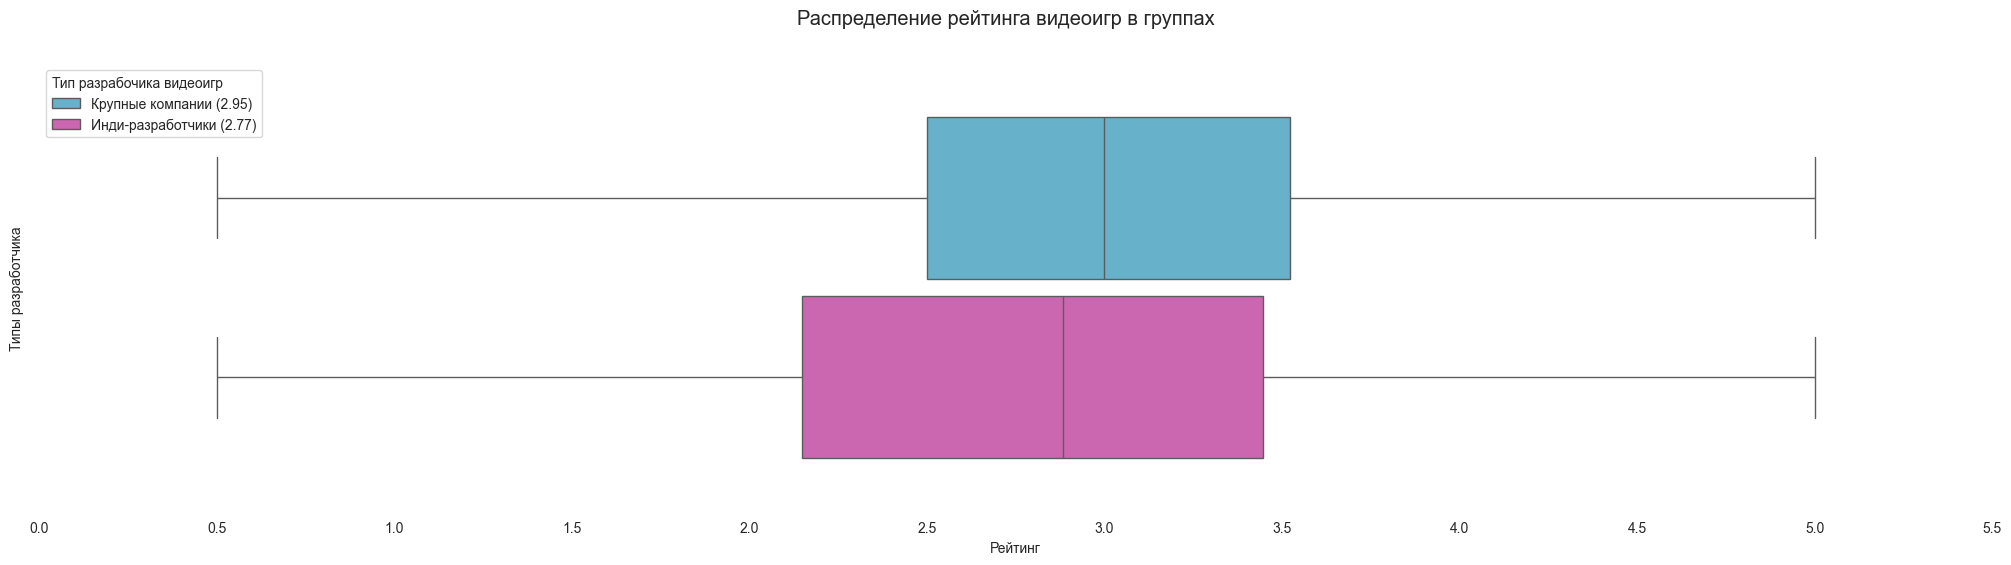

In [23]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Распределение рейтинга видеоигр в группах', 
    y=1.1, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (groups
             .unstack()
             .reset_index(level=0)
             .rename(columns={'level_0': 'group', 0: 'value'}))

sns.boxplot(
    data=plot_data,
    x='value',
    hue='group',
    whis=(0, 100),
    gap=0.1,
    palette=sns.color_palette('hls', 15)[8::5],
    ax=figure.axes[0],
)

figure.axes[0].set_xlabel('Рейтинг')
figure.axes[0].set_ylabel('Типы разработчика')
figure.axes[0].set_xbound((0.0, 5.5))
figure.axes[0].set_xticks(np.linspace(0.0, 5.5, 12))
figure.axes[0].legend(
    handles=figure.axes[0].get_legend().legend_handles,
    title='Тип разрабочика видеоигр',
    labels=[f'Крупные компании ({groups["company"].mean():.2f})', 
            f'Инди-разработчики ({groups["indie"].mean():.2f})'],
    loc='upper left', 
    alignment='left'
);
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)

По результатам двустороннего **t-теста** можно утерждать, что среднее значение рейтинга для видеоигр, выпущенных **крпными компаниями** и **инди-разработчиками не равны**. На коробчатой диаграмме видно, что медиана, 1 и 3 квартили рейтинга видеоигр, выпущенные **инди-разработчиками** имеют меньшие значения, чем у видеоигр, выпущенных **крпными компаниями**.

#### Игровая платформа

Сформируем группы с помощью протсых случайных выборок.

In [24]:
size = 500
data = df.explode('platforms')
groups = pd.DataFrame(index=range(size))
for platform in data.loc[:, 'platforms'].value_counts().iloc[:10].index:
    group = pd.DataFrame(
        data={platform: (data
                         .loc[(data['platforms'] == platform) & (data['rating'].notna()), 'rating']
                         .sample(
                             n=size, 
                             random_state=RANDOM_STATE,
                             ignore_index=True
                             )
                        )
             }
    )
    groups = groups.join(group, how='inner')
groups

,Windows PC,Mac,Nintendo Switch,PlayStation 4,Linux,Xbox One,iOS,Android,Web browser,PlayStation 3
0,3.000000,3.130435,3.376405,3.058824,1.750000,2.750000,3.214286,3.780000,1.000000,2.836449
1,3.882353,3.000000,2.812500,4.368644,3.575730,2.885965,2.805556,3.375000,2.433333,3.634615
2,3.000000,3.848214,3.334733,2.250000,3.000000,2.258065,0.750000,2.868421,2.500000,2.858974
3,3.318190,3.045455,3.503711,1.000000,4.500000,3.833333,1.000000,2.500000,4.000000,2.648840
4,4.000000,3.000000,4.500000,3.562500,1.500000,2.538461,3.250000,2.727273,3.000000,4.025000
...,...,...,...,...,...,...,...,...,...,...
495,2.666667,0.500000,1.000000,3.957831,3.569444,2.944444,3.000000,2.100000,2.583333,2.083333
496,2.125000,2.000000,3.785714,2.500000,1.900000,3.314754,3.333333,3.909091,4.500000,3.100000
497,2.000000,3.750000,3.500000,3.449004,3.500000,4.500000,2.600000,2.944444,3.750000,3.331093
498,2.750000,1.000000,2.659091,2.940860,0.500000,3.294545,2.276316,3.047619,3.500000,2.142857


Воспользуемся **тестом Бартлетта**, чтобы проверить выборки на равенство дисперсий. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: дисперсии популяций, из которых взяты выборки, **равны**.
- **H1**: дисперсии популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **тест Бартлетта**.

In [25]:
result = stats.bartlett(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 38.89104.
p-value: 1.20536e-05


Воспользуемся **ANOVA**, чтобы оценить влияние игровой платформы на ретийнг видеоигр. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: средние значения популяций, из которых взяты выборки, **равны**.
- **H1**: средние значения популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **ANOVA**.

In [26]:
result = stats.f_oneway(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 6.56679.
p-value: 2.28687e-09


По результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от игровой платформы, для которой была выпущенна видеоигра.

Используем апостериорный тест множественного сравнения **Tukey HSD** для попарного сравнения всех групп.

In [27]:
results = stats.tukey_hsd(*groups.T.to_numpy())

In [28]:
platforms = (data
             .loc[:, 'platforms']
             .explode()
             .value_counts()
             .iloc[:10]
             .index
             .tolist())
table = pd.DataFrame(
    index=pd.MultiIndex.from_arrays(
        arrays=[[platform for platform in platforms for _ in range(9)], 
                [x for i in range(10) for j, x in zip(range(10), platforms) if i != j]]
    )
)

result = (results.statistic, 
          results.pvalue, 
          results.confidence_interval()[0], 
          results.confidence_interval()[1])

for i, statistics, pvalues, lowers, uppers in zip(range(10), *result):
    for j, statistic, pvalue, lower, upper in zip(range(10), statistics, pvalues, lowers, uppers): 
        if i != j:
            columns = ['statistic', 'p-value', 'lower CI', 'upper CI']
            table.loc[(platforms[i], platforms[j]), columns] = statistic, pvalue, lower, upper

(table
 .style
 .format(lambda x: f'{x:.5f}'))

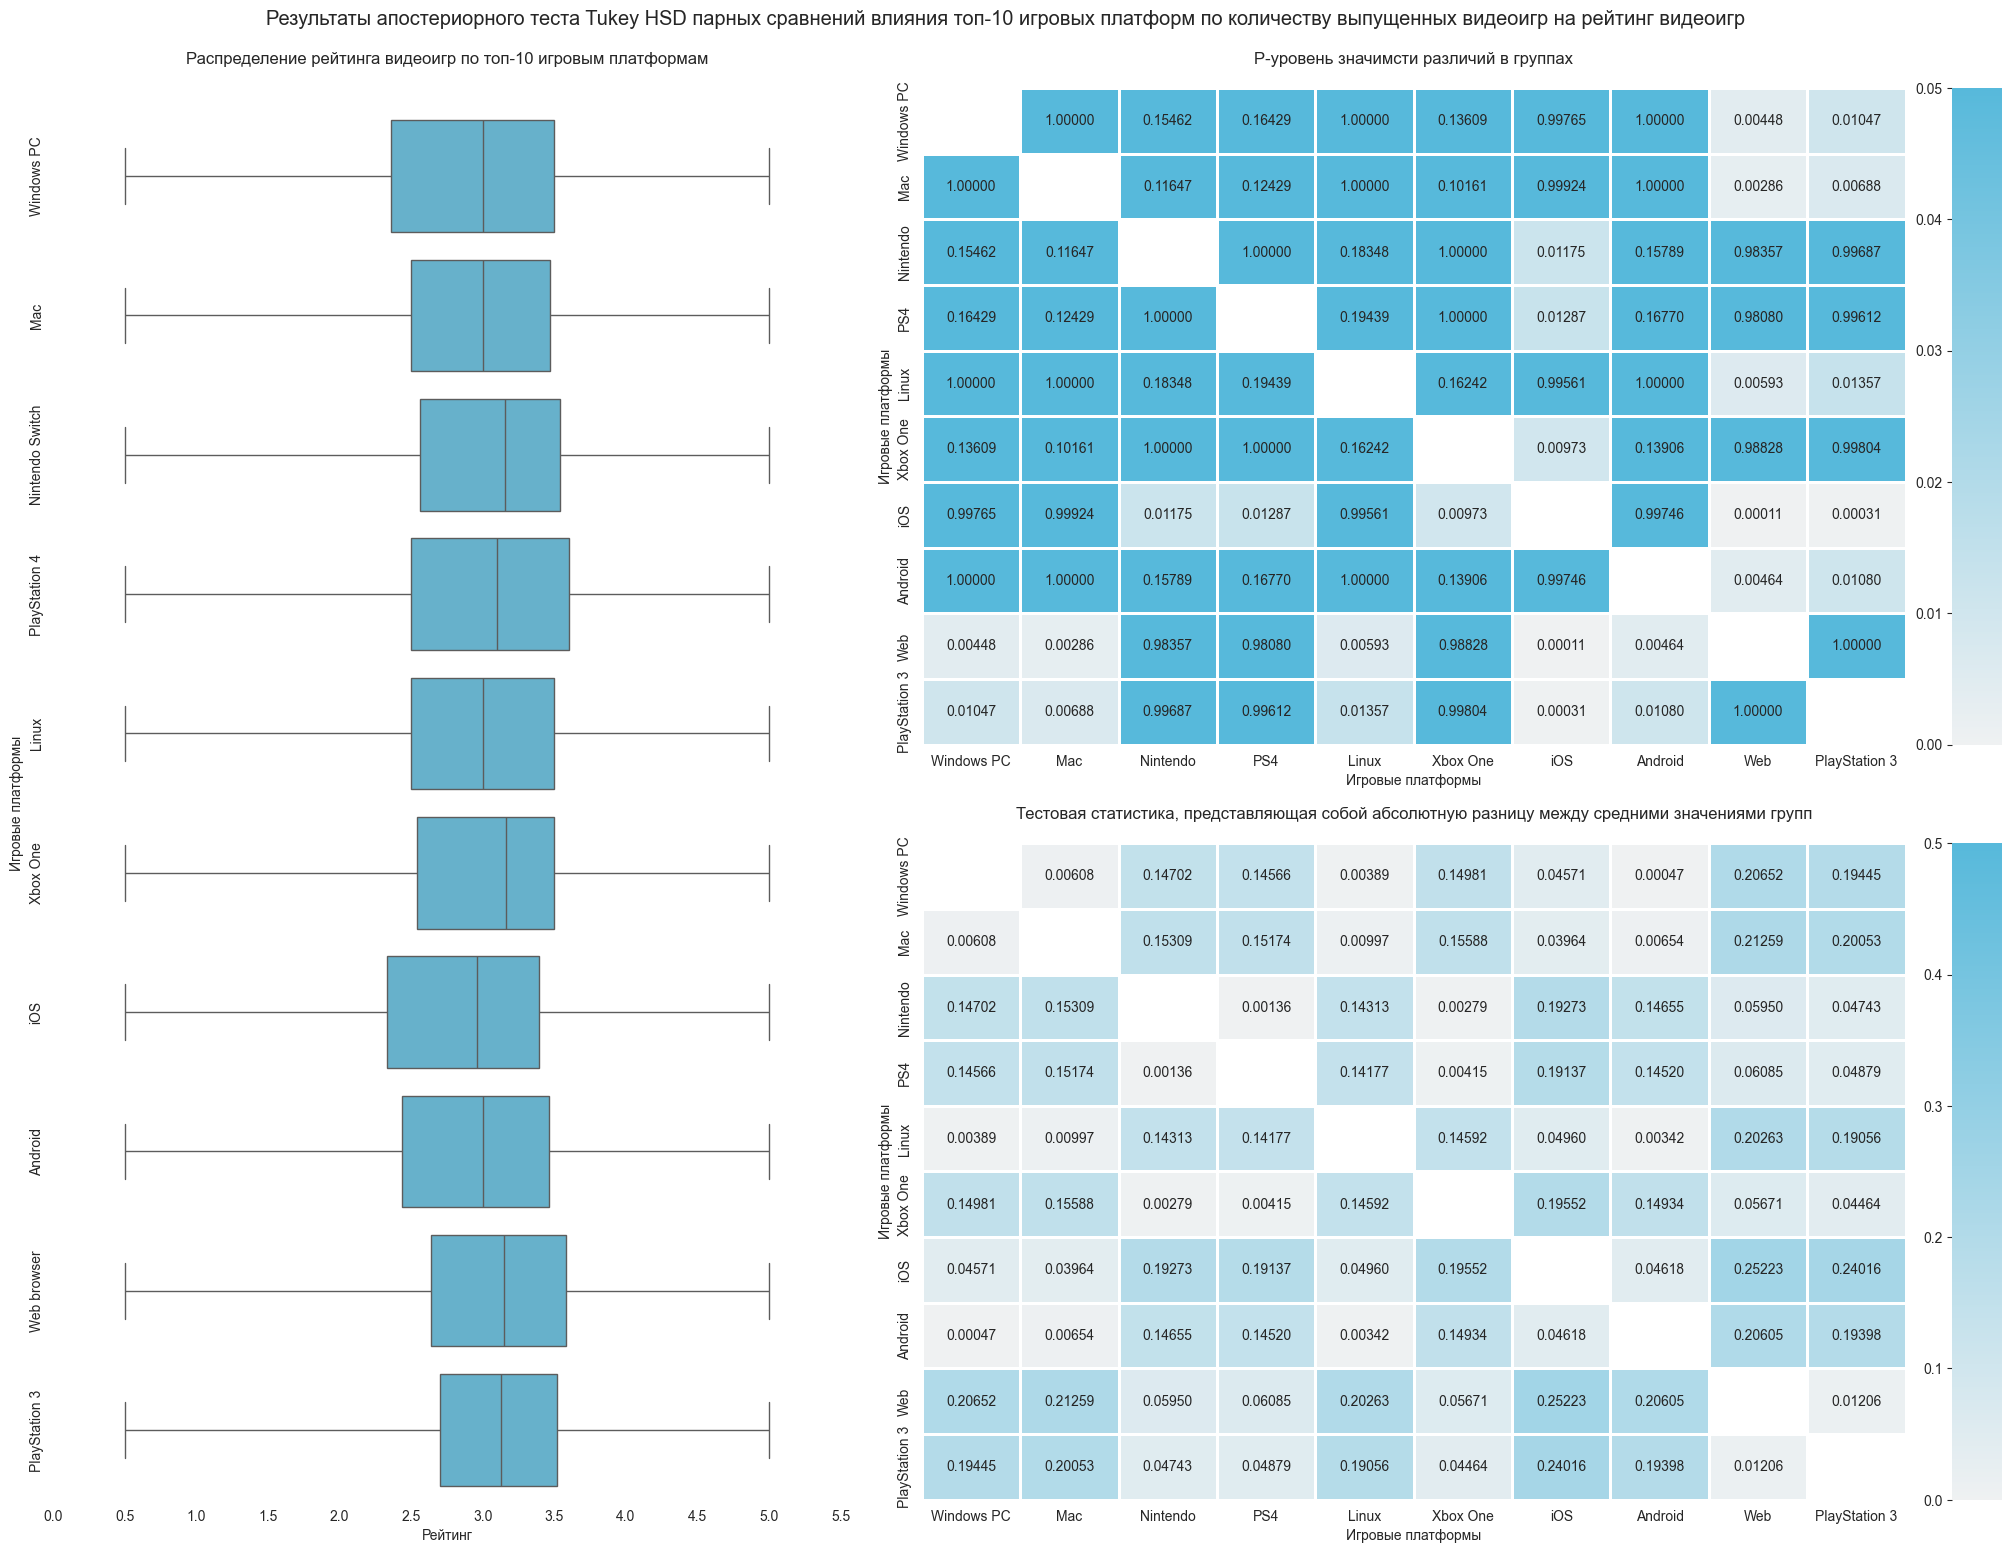

In [29]:
figure = plt.figure(
    layout='constrained', 
    figsize=(20, 15))

figure.suptitle(
    t=('Результаты апостериорного теста Tukey HSD парных сравнений '
       'влияния топ-10 игровых платформ по количеству выпущенных видеоигр '
       'на рейтинг видеоигр'), 
    y=1.025, 
    fontsize='x-large'
)

subfigures: list[plt.Figure] = list(figure.subfigures(
    nrows=1,
    ncols=2,
    hspace=0.05,
    width_ratios=[0.75, 1]
))

grid = GridSpec(
    figure=subfigures[1],
    nrows=2,
    ncols=2,
    wspace=0.01,
    hspace=0.025,
    width_ratios=[1, 0.05]
)

subfigures[0].add_subplot()
subfigures[1].add_subplot(grid[0, 0])
subfigures[1].add_subplot(grid[0, 1])
subfigures[1].add_subplot(grid[1, 0])
subfigures[1].add_subplot(grid[1, 1])

platforms = data.loc[:, 'platforms'].value_counts().iloc[:10]

plot_data = (groups
             .unstack()
             .reset_index(level=0)
             .rename(
                 columns={'level_0': 'platforms', 0: 'values'}
             ))

sns.boxplot(
    data=plot_data,
    x='values',
    y='platforms',
    whis=(0, 100),
    ax=subfigures[0].axes[0],
    color=sns.color_palette('hls', 15)[8], 
    fliersize=3
)

subfigures[0].axes[0].set_title(
    label=('Распределение рейтинга видеоигр '
           'по топ-10 игровым платформам'),
    y=1.025,
    fontsize='large'
)
subfigures[0].axes[0].set_xlabel('Рейтинг')
subfigures[0].axes[0].set_ylabel('Игровые платформы')
subfigures[0].axes[0].set_xticks(np.linspace(0.0, 5.5, 12))
subfigures[0].axes[0].set_xbound((0.0, 5.5))
subfigures[0].axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=platforms.index,
    rotation=90,
    verticalalignment='center'
)
for s in 'top', 'right', 'bottom', 'left':
    subfigures[0].axes[0].spines[s].set_visible(False)

labels = (platforms
          .rename(index={'Nintendo Switch': 'Nintendo',
                         'Web browser': 'Web',
                         'PlayStation 2': 'PS2',
                         'PlayStation 4': 'PS4'})
          .index)

plot_data = (table['p-value']
             .unstack(0)[platforms.index]
             .sort_index(key=lambda x: platforms.rank()[x], 
                         ascending=False))

sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.05
)

subfigures[1].axes[0].set_title(
    label='P-уровень значимсти различий в группах',
    y=1.025,
    fontsize='large'
)
subfigures[1].axes[0].set_xlabel('Игровые платформы')
subfigures[1].axes[0].set_ylabel('Игровые платформы')
subfigures[1].axes[0].set_xticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
)
subfigures[1].axes[0].set_yticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
    rotation=90,
    verticalalignment='center'
)
subfigures[1].axes[1].set_yticks(np.linspace(0., 0.05, 6))
subfigures[1].axes[1].set_ybound((0., 0.05))

plot_data = (table['statistic']
             .unstack(0)[platforms.index]
             .sort_index(key=lambda x: platforms.rank()[x], ascending=False)
             .abs())
             
sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[2],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[3],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.5
)

subfigures[1].axes[2].set_title(
    label=('Тестовая статистика, '
           'представляющая собой абсолютную разницу '
           'между средними значениями групп'),
    y=1.025,
    fontsize='large'
)

subfigures[1].axes[2].set_xlabel('Игровые платформы')
subfigures[1].axes[2].set_ylabel('Игровые платформы')
subfigures[1].axes[2].set_xticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
)
subfigures[1].axes[2].set_yticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
    rotation=90,
    verticalalignment='center'
)
subfigures[1].axes[3].set_ybound((0., 0.5))
subfigures[1].axes[3].set_yticks(np.linspace(0., 0.5, 6));

По результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются во многих группах. Наибольшее различие наблюдается между игровыми платформами **iOS** и **Web browser** (различие среднего значения в группах более **0.25**).

#### Игровой жанр

Сформируем группы с помощью протсых случайных выборок.

In [30]:
size = 500
data = df.explode('genres')
groups = pd.DataFrame(index=range(size))
for genre in data.loc[:, 'genres'].value_counts().iloc[:10].index:
    group = pd.DataFrame(
        data={genre: (data
                         .loc[(data['genres'] == genre) & (data['rating'].notna()), 'rating']
                         .sample(
                             n=size, 
                             random_state=RANDOM_STATE,
                             ignore_index=True
                             )
                        )
             }
    )
    groups = groups.join(group, how='inner')
groups

,Adventure,RPG,Simulator,Strategy,Shooter,Puzzle,Arcade,Platform,Sport,Visual Novel
0,0.750000,3.467320,3.750000,3.111111,2.500000,3.000000,2.550000,1.500,4.025862,3.750000
1,3.000000,3.728358,4.166667,4.000000,2.333333,3.144231,3.000000,2.900,3.750000,3.812500
2,3.250000,2.950000,3.333333,3.056250,2.550000,2.000000,2.962963,3.700,3.500000,4.500000
3,3.000000,3.300000,2.416667,2.441176,3.103053,3.000000,3.750000,3.000,3.250000,3.981482
4,4.000000,5.000000,3.000000,3.057692,3.800000,5.000000,2.750000,2.000,2.750000,0.500000
...,...,...,...,...,...,...,...,...,...,...
495,3.000000,0.500000,2.750000,2.500000,2.000000,3.500000,2.500000,2.250,2.300000,3.300000
496,3.579316,5.000000,3.576923,4.000000,2.250000,1.894737,4.000000,2.125,3.270492,2.750000
497,2.746753,2.490196,2.857143,5.000000,3.604620,2.333333,2.857143,0.500,4.000000,3.545455
498,3.000000,4.500000,0.500000,1.166667,1.615385,3.500000,3.148649,4.500,2.500000,4.000000


Воспользуемся **тестом Бартлетта**, чтобы проверить выборки на равенство дисперсий. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: дисперсии популяций, из которых взяты выборки, **равны**.
- **H1**: дисперсии популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **тест Бартлетта**.

In [31]:
result = stats.bartlett(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 23.23102.
p-value: 5.69780e-03


Воспользуемся **ANOVA**, чтобы оценить влияние игровой платформы на ретийнг видеоигр. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: средние значения популяций, из которых взяты выборки, **равны**.
- **H1**: средние значения популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **ANOVA**.

In [32]:
result = stats.f_oneway(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 12.00623.
p-value: 6.05624e-19


По результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от жанра, в котором была выпущенна видеоигра.

Используем апостериорный тест множественного сравнения **Tukey HSD** для попарного сравнения всех групп.

In [33]:
results = stats.tukey_hsd(*groups.T.to_numpy())

In [34]:
genres = (data
             .loc[:, 'genres']
             .explode()
             .value_counts()
             .iloc[:10]
             .index
             .tolist())
table = pd.DataFrame(
    index=pd.MultiIndex.from_arrays(
        arrays=[[genre for genre in genres for _ in range(9)], 
                [x for i in range(10) for j, x in zip(range(10), genres) if i != j]]
    )
)

result = (results.statistic, 
          results.pvalue, 
          results.confidence_interval()[0], 
          results.confidence_interval()[1])

for i, statistics, pvalues, lowers, uppers in zip(range(10), *result):
    for j, statistic, pvalue, lower, upper in zip(range(10), statistics, pvalues, lowers, uppers): 
        if i != j:
            columns = ['statistic', 'p-value', 'lower CI', 'upper CI']
            table.loc[(genres[i], genres[j]), columns] = statistic, pvalue, lower, upper

(table
 .style
 .format(lambda x: f'{x:.5f}'))

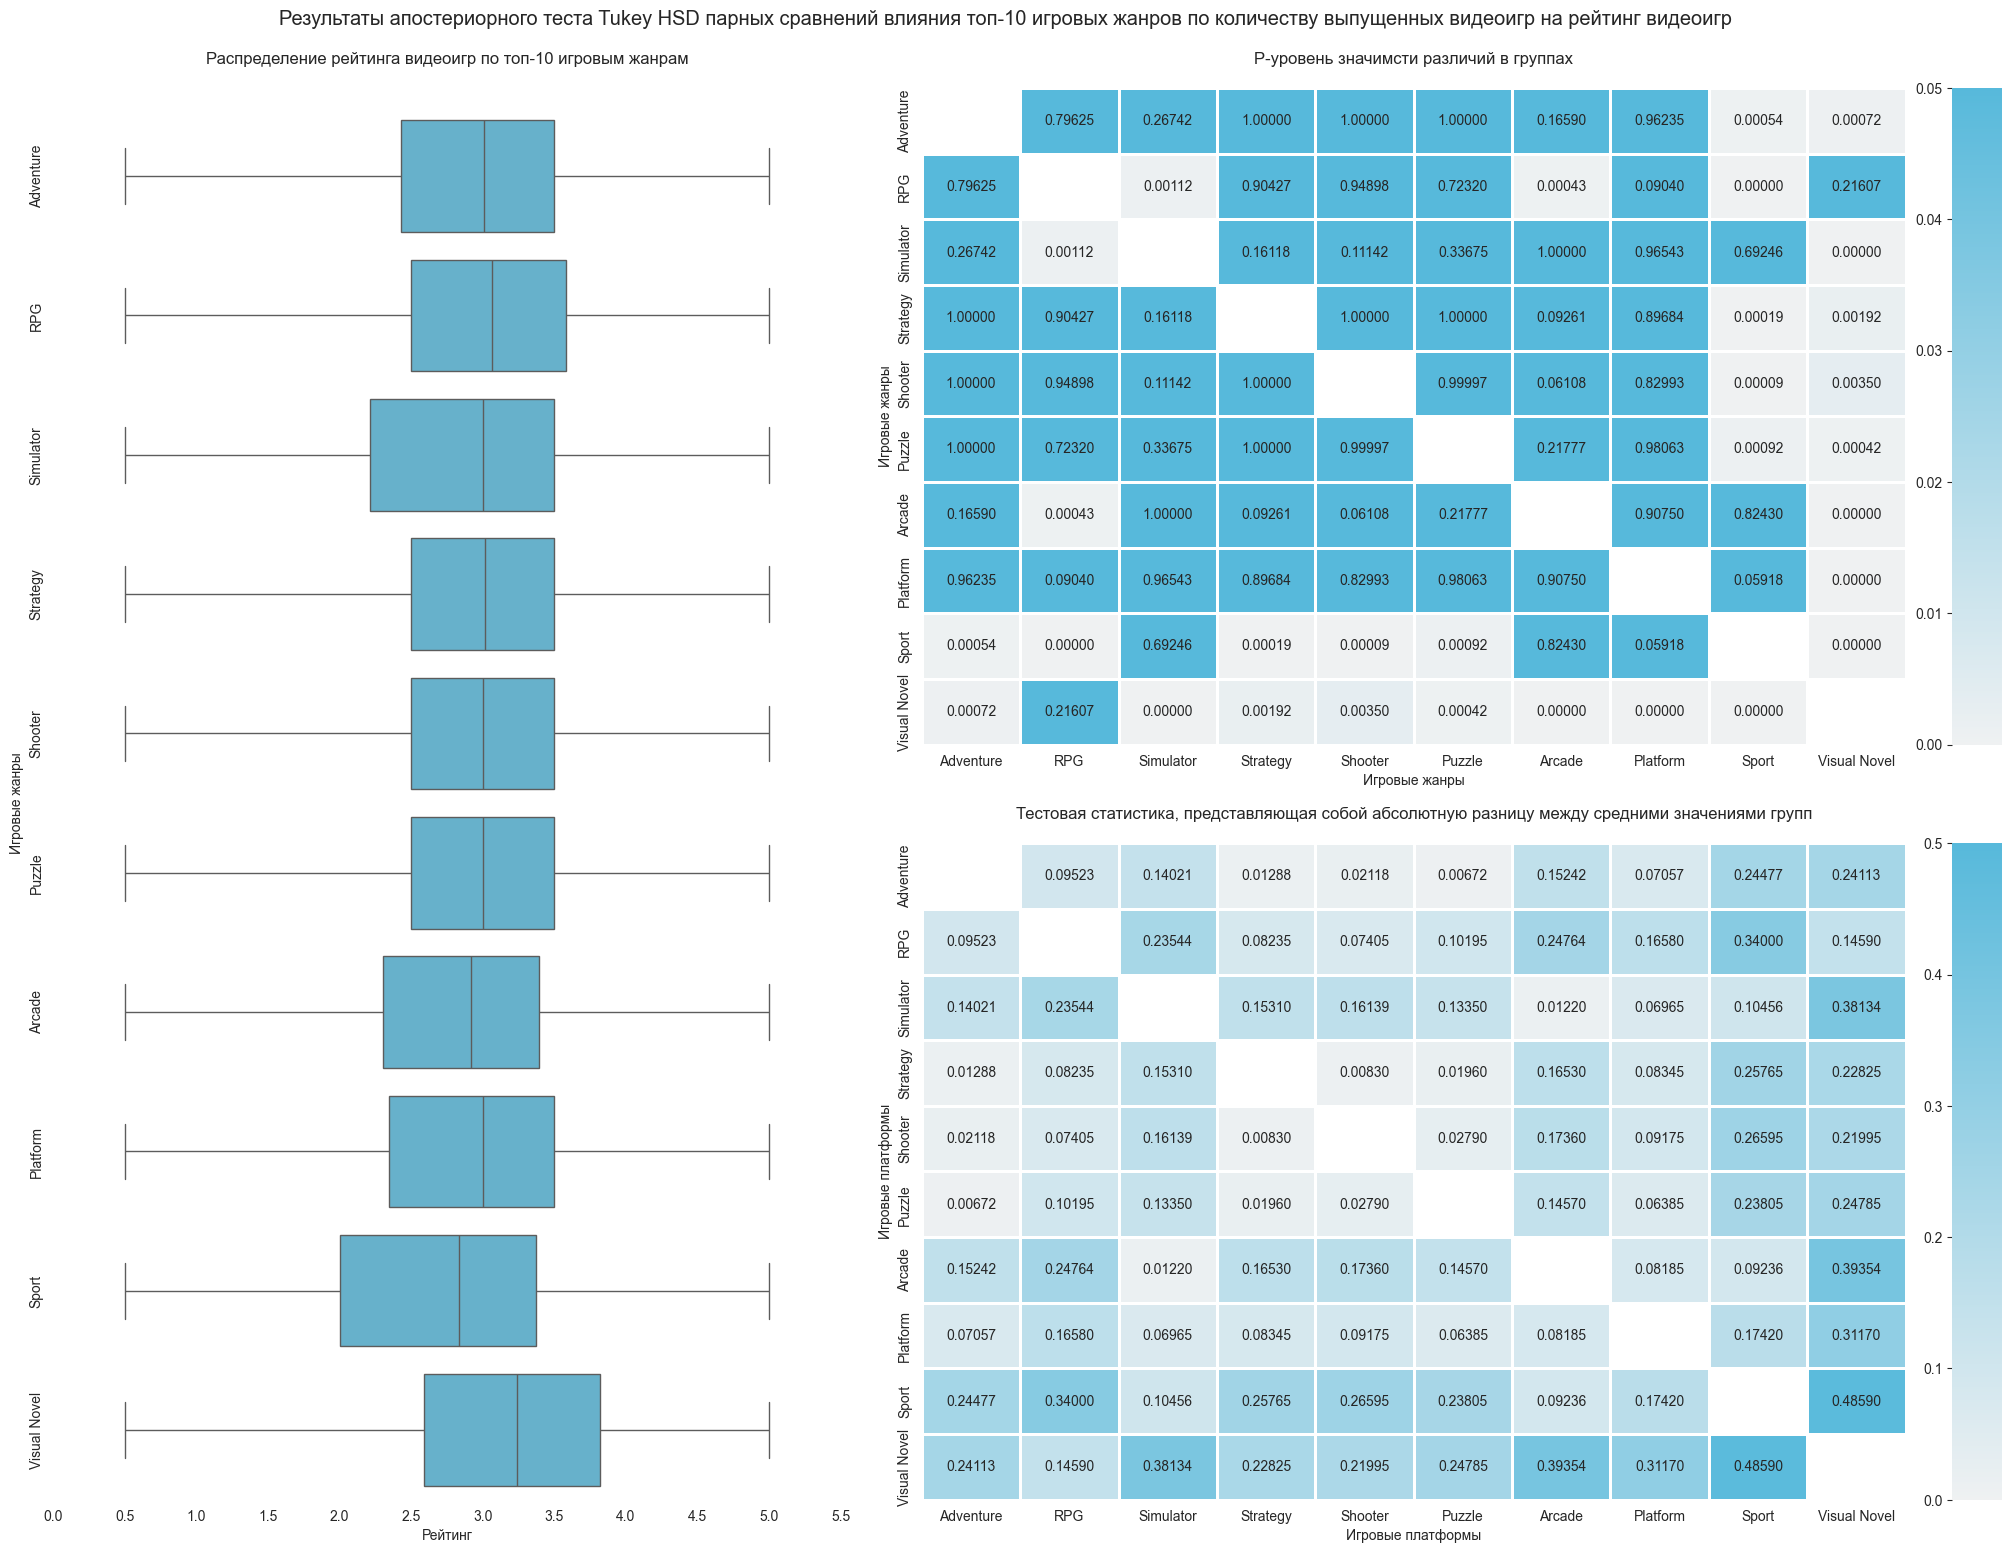

In [35]:
figure = plt.figure(
    layout='constrained', 
    figsize=(20, 15))

figure.suptitle(
    t=('Результаты апостериорного теста Tukey HSD парных сравнений '
       'влияния топ-10 игровых жанров по количеству выпущенных видеоигр '
       'на рейтинг видеоигр'), 
    y=1.025, 
    fontsize='x-large'
)

subfigures: list[plt.Figure] = list(figure.subfigures(
    nrows=1,
    ncols=2,
    hspace=0.05,
    width_ratios=[0.75, 1]
))

grid = GridSpec(
    figure=subfigures[1],
    nrows=2,
    ncols=2,
    wspace=0.01,
    hspace=0.025,
    width_ratios=[1, 0.05]
)

subfigures[0].add_subplot()
subfigures[1].add_subplot(grid[0, 0])
subfigures[1].add_subplot(grid[0, 1])
subfigures[1].add_subplot(grid[1, 0])
subfigures[1].add_subplot(grid[1, 1])

genres = data.loc[:, 'genres'].value_counts().iloc[:10]

plot_data = (groups
             .unstack()
             .reset_index(level=0)
             .rename(
                 columns={'level_0': 'genres', 0: 'values'}
             ))

sns.boxplot(
    data=plot_data,
    x='values',
    y='genres',
    whis=(0, 100),
    ax=subfigures[0].axes[0],
    color=sns.color_palette('hls', 15)[8], 
    fliersize=3
)

subfigures[0].axes[0].set_title(
    label=('Распределение рейтинга видеоигр '
           'по топ-10 игровым жанрам'),
    y=1.025,
    fontsize='large'
)
subfigures[0].axes[0].set_xlabel('Рейтинг')
subfigures[0].axes[0].set_ylabel('Игровые жанры')
subfigures[0].axes[0].set_xticks(np.linspace(0.0, 5.5, 12))
subfigures[0].axes[0].set_xbound((0.0, 5.5))
figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=genres.index,
    rotation=90,
    verticalalignment='center'
)
for s in 'top', 'right', 'bottom', 'left':
    subfigures[0].axes[0].spines[s].set_visible(False)
    
plot_data = (table['p-value']
             .unstack(0)[genres.index]
             .sort_index(key=lambda x: genres.rank()[x], 
                         ascending=False))

sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.05
)

subfigures[1].axes[0].set_title(
    label='P-уровень значимсти различий в группах',
    y=1.025,
    fontsize='large'
)
subfigures[1].axes[0].set_xlabel('Игровые жанры')
subfigures[1].axes[0].set_ylabel('Игровые жанры')

plot_data = (table['statistic']
             .unstack(0)[genres.index]
             .sort_index(key=lambda x: genres.rank()[x], ascending=False)
             .abs())
             
sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[2],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[3],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.5
)

subfigures[1].axes[2].set_title(
    label=('Тестовая статистика, '
           'представляющая собой абсолютную разницу '
           'между средними значениями групп'),
    y=1.025,
    fontsize='large'
)

subfigures[1].axes[2].set_xlabel('Игровые платформы')
subfigures[1].axes[2].set_ylabel('Игровые платформы')

subfigures[1].axes[1].set_ybound((0., 0.05))
subfigures[1].axes[1].set_yticks(np.linspace(0., 0.05, 6))

subfigures[1].axes[3].set_ybound((0., 0.5))
subfigures[1].axes[3].set_yticks(np.linspace(0., 0.5, 6));

По результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются во многих группах. Наибольшее различие наблюдается между жанрами **Sport** и **Visual Novel** (различие среднего значения в группах более **0.48**). 

# Выводы
***

1. Оценка распределения:
    - путем визуальной оценки гистограммы и графика Q-Q можно сделать вывод, что распределение данных рейтинга видеоигр подчиняется закону распределения, который **близок к нормальному**.
    - по результатам теста **Шапиро-Уилка**, **нельзя утверждать**, что рейтинг видеоигр подчиняется **нормальному** закону распределения;
2. Оценка влияния факторов:
    1. Тип разработчика:
        - по результатам двустороннего **t-теста** можно утерждать, что среднее значение рейтинга для видеоигр, выпущенных **крпными компаниями** и **инди-разработчиками не равны**;
        - на коробчатой диаграмме видно, что медиана, 1 и 3 квартили рейтинга видеоигр, выпущенные **инди-разработчиками** имеют меньшие значения, чем у видеоигр, выпущенных **крпными компаниями**.
    2. Игровая платформа
        - по результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от игровой платформы, для которой была выпущенна видеоигра;
        - по результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются во многих группах. Наибольшее различие наблюдается между игровыми платформами **iOS** и **Web browser** (различие среднего значения в группах более **0.25**).
    3. Игровой жанр:
        - по результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от жанра, в котором была выпущенна видеоигра.
        - по результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются во многих группах. Наибольшее различие наблюдается между жанрами **Sport** и **Visual Novel** (различие среднего значения в группах более **0.48**). 